# 나이브 베이즈 정리


P(A|B) : 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률 

P(B|A) : 어떤 사건 A가 일어났을 떄 사건 B가 일어날 확률
    
p(주문|저녁) = p(저녁|주문) * p(주문) / p(저녁)
             = (3/4  * 4/10) / (5/10) = 0.6
             
p(주문|저녁, 성인) = p(저녁, 성인|주문) * p(주문) / p(저녁, 성인)

결합확률
p(A, B) = p(A|B)P(B)
P(A, B) = P(A) * P(B)

* 저녁때 성인 맥주 주문할 확률
P(주문|저녁, 성인) = P(저녁|주문) * P(성인|주문) * p(주문) / P(저녁) * P(성인)
(3/10) / 

* 저녁때 성인 맥주 주문하지 않을 확률
P(주문안함| 저녁, 성인) =  P(저녁|주문 안함) * P(성인|주문 안함) * p(주문 안함) / P(저녁) * P(성인)



#### 나이브 베이즈

* 분류 알고리즘의 대표

데이터를 나이브한(단순한) 독립 사건으로 가정하고 이 독립 사건들을 베이즈 이론에 대입하여 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘

#### 베이즈 이론:

확률론과 통계학에서, 베이즈정리는 두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리다. 
베이즈 확률론 해석에 따르면 베이즈 정리는 사전확률로부터 사후확률을 구할 수 있다.


P(A|B) = P(A and B) / P(B)
       = P(B|A) * P(A) / P(B)
       = P(B and A) / P(A) * P(A) / P(B)
       
1. P(A) = 10 / 12

2. P(B) = 5 / 12

3. B 사건이 일어났을 때 A사건이 일어날 확률 



* 저녁때 맥주 주문 확률

P(주문|저녁) = P(저녁|주문) * P(주문) / P(저녁)
             = (3/4 * 4/10) / (5/10) = 0.6 (주문확률 60%) 
             
* 저녁에 성인 맥주 주문 확률

P(주문|저녁, 성인)  = P(저녁, 성인|주문) * P(주문)


    * 결합확률 : P(A, B) = P(A|B)P(B)
    P(A, B) = P(A) * P(B) : A 와 B를 독립적으로 간주하고 간략화
    
    
    1. 저녁 때 성인 맥주 주문할 확률
     P(주문|저녁, 성인) = P(저녁|주문) * P(성인|주문) * P(주문)
                       = P(저녁 and 주문) / p(주문)   *    P(성인 and 주문) / P(주문)  *  P(주문)
                       = (3/10) / (4/10)  *  (4/10) / (4/10) * (4/10)
                       = 0.3
                       
    2. 저녁 때 성인 맥주 주문하지 않을 확률
     P(주문안함 | 저녁, 성인) = P(저녁|주문안함) * P(성인|주문안함) * P(주문안함)
                              = P(주문안함 and 저녁) / P(주문안함)  * P(성인 and 주문안함) / P(주문안함) * P(주문안함)
                              = (2/10) / (6/10) * (2/10) / (6/10) * (6/10)  = 0.066
                              
                              
    3. P(주문| 저녁, 성인) 확률이 더 크므로 저녁에 성인이 올 경우 맥주 주문할 것으로 보인다. 
                       


## 나이브 베이즈 알고리즘 종류

* 가우시안 나이브 베이즈 분류
 : 특징들의 값이 정규 분포(가우시안 분포)되어 있다는 가정 하에 조건부 확률을 계산, 연속적인 특징이 있는 데이터를 분류하는데 적합.

EX) 꽃받침 길이에 따른 IRIS 분류

* 다항 분포 나이브 베이즈 분류 
 : 데이터의 특징이 출현 횟수로 표현되었을 때 사용.
 
 주사위를 10번 던졌을 때 1이 한번, 2가 2번, 3이 세번, 4가 4번 나왔을 경우 10번 던진 결과 데이터를 (1,2,3,4,0,0)으로 나타ㅐㄴㄹ 수 있다. 
 


* 베르누이 나이브 베이즈 분류



In [19]:
# 시각화를 위해 PANDAS를 임포트 합니다. 
import pandas as pd

# iris 데이터는 sklearn에서 직접 로드할 수 있습니다. 
from sklearn.datasets import load_iris

# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다. 
from sklearn.model_selection import train_test_split

#가우시안 나이브 베이즈로 iris데이터를 분류하도록 하겠습니다. 
from sklearn.naive_bayes import GaussianNB

# 분류 성능을 측정하기 위해 metrics와 accuracy_score를 임포트 합니다.  

from sklearn import metrics
from sklearn.metrics import accuracy_score

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다. 
import numpy as np
np.random.seed(5)

# iris 데이터를 불러옵니다.
dataset = load_iris()

# pandas의 데이터 프레임으로 데이터를 저장합니다. 
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

# 분류값을 데이터프레임에 저장합니다. 
df['target'] = dataset.target

# 숫자인 분류값을 이해를 돕기 위해 문자로 변경합니다.
df.target = df.target.map({0:'setosa', 1: 'versicolor', 2: 'virginica'})

#데이터를 확인해봅니다. 
df.head()




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


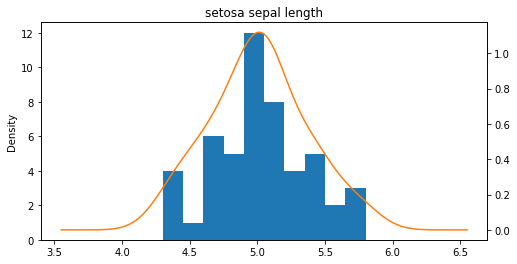

In [20]:
# 분류값 별로 데이터 프레임을 나눕니다.
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

#  sepal length (cm)

ax = setosa_df['sepal length (cm)'].plot(kind = 'hist')
setosa_df['sepal length (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'setosa sepal length',
                                  figsize = (8, 4))


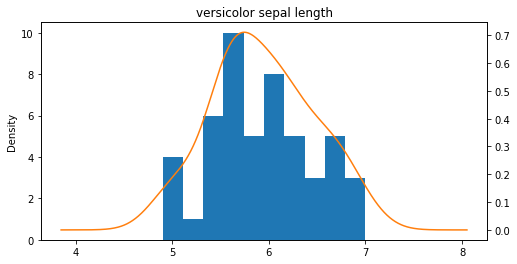

In [21]:
ax = versicolor_df['sepal length (cm)'].plot(kind = 'hist')
versicolor_df['sepal length (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'versicolor sepal length',
                                  figsize = (8, 4))


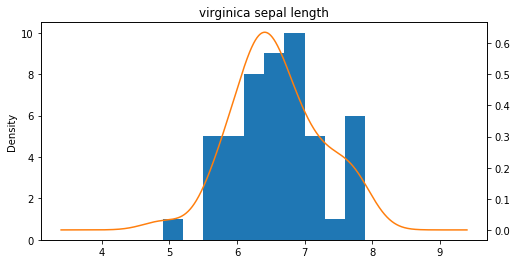

In [22]:
ax = virginica_df['sepal length (cm)'].plot(kind = 'hist')
virginica_df['sepal length (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'virginica sepal length',
                                  figsize = (8, 4))


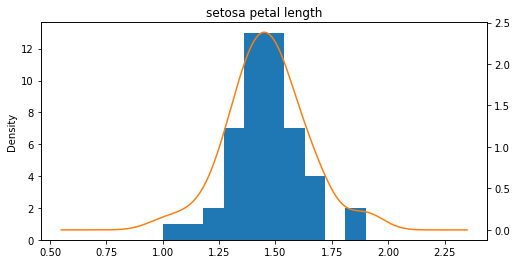

In [39]:
ax = setosa_df['petal length (cm)'].plot(kind = 'hist')
setosa_df['petal length (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'setosa petal length',
                                  figsize = (8, 4))


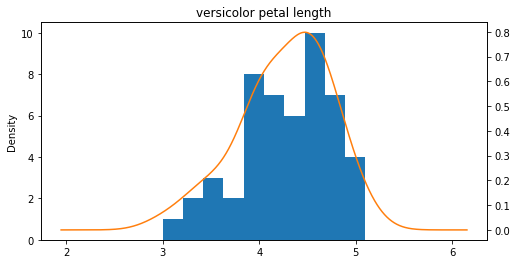

In [24]:
ax = versicolor_df['petal length (cm)'].plot(kind = 'hist')
versicolor_df['petal length (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'versicolor petal length',
                                  figsize = (8, 4))


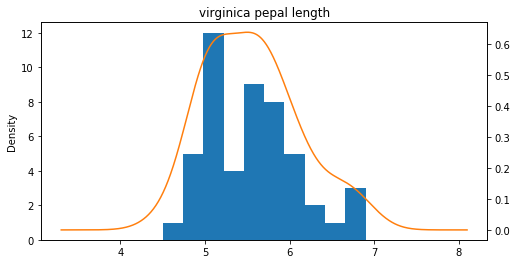

In [31]:
ax = virginica_df['petal length (cm)'].plot(kind = 'hist')
virginica_df['petal length (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'virginica pepal length',
                                  figsize = (8, 4))

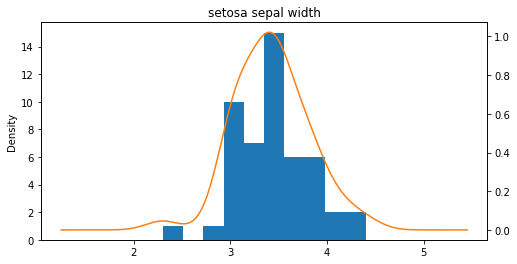

In [40]:
ax = setosa_df['sepal width (cm)'].plot(kind = 'hist')
setosa_df['sepal width (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'setosa sepal width',
                                  figsize = (8, 4))


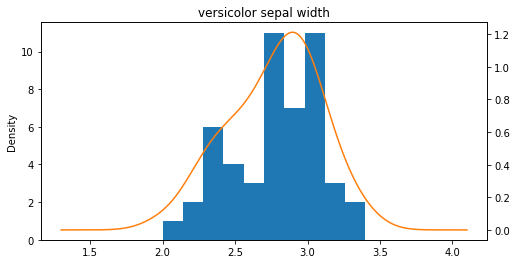

In [42]:
ax = versicolor_df['sepal width (cm)'].plot(kind = 'hist')
versicolor_df['sepal width (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'versicolor sepal width',
                                  figsize = (8, 4))

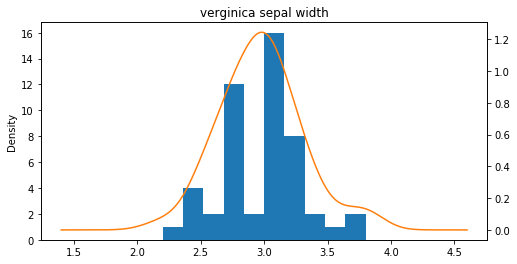

In [43]:
ax = virginica_df['sepal width (cm)'].plot(kind = 'hist')
virginica_df['sepal width (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'verginica sepal width',
                                  figsize = (8, 4))


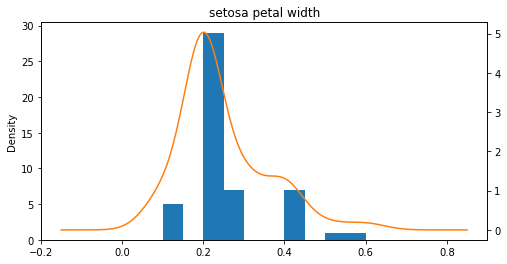

In [44]:
ax = setosa_df['petal width (cm)'].plot(kind = 'hist')
setosa_df['petal width (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'setosa petal width',
                                  figsize = (8, 4))


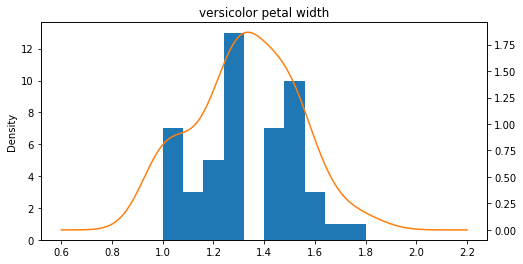

In [45]:
ax = versicolor_df['petal width (cm)'].plot(kind = 'hist')
versicolor_df['petal width (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'versicolor petal width',
                                  figsize = (8, 4))

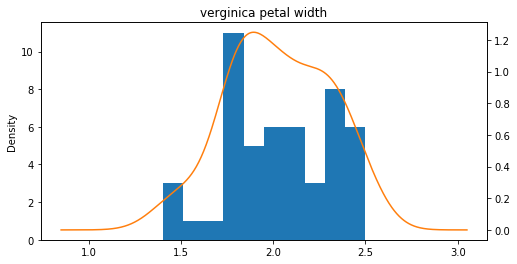

In [46]:
ax = virginica_df['petal width (cm)'].plot(kind = 'hist')
virginica_df['petal width (cm)'].plot(kind = 'kde',
                                  ax = ax, 
                                  secondary_y = True,
                                  title = 'verginica petal width',
                                  figsize = (8, 4))


In [27]:
# 20%를 테스트 데이터로 분류합니다. 

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2)

In [47]:
# Gausian Naive Bayes 분류하기

#학습데이터로 모델을 학습합니다.
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 테스트합니다. 
expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(y_test, predicted))         #support : test에 있는 각 클래스별 항목의 갯수

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [29]:
accuracy_score(y_test, predicted)

0.9

# Confusion Matrix

#### 아래 confusion matrix 에서 보낼 수 있듯이 1개의 데이터만 제외하고, 모든 데이터가 정확히 분류


In [49]:
print(metrics.confusion_matrix(expected, predicted))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


# 베르누이 나이브 베이즈를 위한 라이브러리를 임포트


In [50]:
import numpy as np
import pandas as pd

# 베르누이 나이브베이즈를 위한 라이브러리를 임포트합니다.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

# 모딜의 정확도 평가를 위해 임포트 합니다. 
from sklearn.metrics import accuracy_score

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다. 
np.random.seed(5)

# 베르누이 나이브베이즈 분류 모델을 사용하여 스팸 메일을 분류

## 데이터 수집

#### 이번 실습에서는 간단한 스팸 메일 분류 실습을 위해 아래 이메일 타이틀과 스팸 여부가 있는 데이터를 사용

In [53]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

In [52]:
df = pd.DataFrame(email_list)

In [54]:
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


### 데이터 다듬기

sklearn의 베르누이 나이브베이즈 분류기(BernoulliNB)는 숫자만을 다루기 때문에, 
True 와 False를 1과 0 으로 치환하겠습니다. 

In [55]:
df['label'] = df['spam'].map({True:1, False:0})

In [56]:
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


학습에 사용될 데이터와 분류값을 나눕니다. 

In [57]:
df_x = df['email title']
df_y = df['label']

베르누이 나이브베이즈의 입력 데이터는 고정된 크기의 벡터로써,
0과 1로 구분된 데이터여야 합니다. 
sklearn의 CountVectorizer를 사용하여 쉽게 구현할 수 있습니다. 
CountVectorizer는 입력된 데이터(6개의 이메일)에 출현된 모든 단어의 갯수만큼의 크기의 벡터를 만든 후, 
각각의 이메일을 그 고정된 벡터로 표현합니다.

binary = True 를 파라미터로 넘겨줌으로써, 각각의 이메일마다 단어가 한번이상 출현하면 1, 출현하지 않을 경우 0으로 표시하게 합니다. 

In [58]:
cv = CountVectorizer(binary = True)
x_traincv = cv.fit_transform(df_x)

아래의 행렬에서 볼 수 있듯, 데이터에서 총 17개의 단어가 발견되어, 각각의 이메일이 17개의 크기를 갖는 벡터로 표현되었습니다.
또한, 베르누이 나이브베이즈에 사용하기 위해 중복된 단어가 이메일 제목에 있더라도, 
1로 표현된 것을 확인할 수 있습니다. 

limited time offer only today only today: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

In [65]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [62]:
# 벡터로 인코딩 된 이메일 제목에 어떤 단어들이 포함되어 있는 지 알고싶은 경우, 아래의 명령어로 알 수 있다. 
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [63]:
# 벡터의 17개의 인덱스가 각각 무슨 단어를 의미하는 지 알고 싶을 경우, 아래의 명령어를 통해 알 수 있다. 

cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

#### 베르누이 나이브 베이즈 분류

베르누이 나이브 베이즈로 스팸 메일을 분류해 보도록 하겠습니다.
BernoulliNB는 기본적으로 스무딩을 지원하므로,
학습데이터에 없는 단어가 테스트에 풀현해도 분류를 이상없이 진행합니다. 

학습 데이터로 베르누이 분류기를 학습합니다. 

In [73]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [74]:
# 테스트 데이터 다듬기


test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
               ]

In [75]:
test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1, False:0})
test_x = test_df["email title"]
test_y = test_df["label"]
x_testcv = cv.transform(test_x)

In [76]:
predictions = bnb.predict(x_testcv)

In [77]:
accuracy_score(test_y, predictions)

0.8333333333333334